In [2]:
import pandas as pd
import numpy as np
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [19]:
import math

In [27]:
from tqdm import tqdm_notebook

answer_text=''

# 페이지에 맞추어 오픈하기
for page in tqdm_notebook(range(10)):
    driver = webdriver.Chrome('./chromedriver')
    url = 'https://kin.naver.com/search/list.nhn?'
    keyword = '여친 선물'
    num = page+1
    full_url = f'{url}query={keyword}&page={num}'
    driver.get(full_url)
    driver.maximize_window()

    # 검색결과의 제목을 찾아서 클릭하기
    dts = driver.find_elements_by_css_selector('dt')
    for dt in dts:
        dt.click()
        driver.switch_to.window(driver.window_handles[-1]) # 상세 페이지 탭으로 이동
        time.sleep(1)
        # 5개 이상인경우 다음페이지로 넘기기
        count = int(driver.find_element_by_css_selector('._answerCount.num').text)
        for next in range(math.floor((count-1)/5)):
            more = driver.find_element_by_id('nextPageButton')
            more.click()
            time.sleep(1)
        # 답변 찾기
        answers = driver.find_elements_by_css_selector('._endContentsText.c-heading-answer__content-user')
        for answer in answers:
            answer_text += answer.text
            time.sleep(1)
        driver.close() #현재 보고있는 창 닫기
        driver.switch_to.window(driver.window_handles[0]) #검색결과 탭으로 이동
    driver.close() # 한 페이지가 다 돌면 창 닫기

In [30]:
file = open('./data/girlfriend.txt', 'w', encoding='utf-8')
file.write(answer_text)
file.close()

### 명사 추출하기

In [37]:
girlfriend_text = open('./data/girlfriend.txt', encoding='utf-8').read()

In [38]:
from konlpy.tag import Okt
okt = Okt()

In [151]:
tokens = okt.nouns(girlfriend_text)
print(tokens[:20])

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품', '투척', '더', '클래식', '남녀', '커플룩', '버핏', '빅사', '이즈', '하프', '니트']


In [40]:
# 영문자, 숫자 제거
import re
new_girlfriend_text = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]', '', token)
    new_girlfriend_text.append(text)
new_girlfriend_text[:5]

['반지', '목걸이', '커플', '가디건', '커플']

In [41]:
import nltk

In [142]:
stop_words = ['커플', '신지', '몇개', '제품', '투척', '더', '클래식', '남녀', '버핏', '빅사', '이즈', '선물', '추천', '것', '하트', '가격', '수', '여친', '가능', '여자친구', '저', '제', '사랑', '생각', '사진', '분', '여자', '요', '사용', '구매', '고급', '판매', '때', '하나', '참고', '해', '제작', '용', '한번', '준', '디자인', '거', '네이버', '사람', '배송', '정말', '중', '후기', '개', '감동', '세대', '티니', '인기', '상품', '머리', '직접', '브랜드', '선택', '곳', '모양', '마감', '네임카드', '등', '요즘', '인테리어', '오늘', '링', '오늘', '가지', '그냥', '위', '페이', '부담', '투비', '남자', '전', '로티', '핸드', '변경', '도움', '협찬', '의미', '색상', '아래', '포장', '체', '조금', '하투', '정도', '보시', '독서', '심플', '여성', '가장', '꽃말', '때문', '정보', '스타일', '밍티풀', '주소', '쇼핑', '링크', '기념일', '질문', '친구', '스토어', '아주', '할인', '미쁜', '스', '이면', '남', '지금', '고민', '센스', '만족', '모델', '아이템', '안쪽', '사이트', '여', '미니', '나', '밴드', '생일', '답변', '날', '쇼핑몰', '꼭', '등등', '크리스마스', '미만', '처', '하루', '드라마', '워터', '기념', '유광', '무광', '뭐', '말', '스마트', '자', '및', '준비', '걸', '세트', '알', '속', '글', '비', '평이', '데', '구성', '이', '저희', '좀','보고', '줄', '활용', '로', '경우', '우정', '크로스', '검색', '사이', '가성', '기억', '에어', '착용', '또한', '각인', '여기', '연인', '도', '보통', '주인공', '키', '여러가지', '향기', '건', '평', '손','일단', '느낌', '채택', '더욱', '이번', '일리', '마크', '확인', '인터넷', '프로', '끈', '추가', '님', '그', '최고', '이용', '인치', '선호', '스카이', '주문', '활동', '토닥토닥', '시간', '를', '피스', '빼빼로데이', '뜰리', '디자이너', '남자친구', '종류', '전문', '수도', '나이']

new_girlfriend_text = [each_word for each_word in new_girlfriend_text if each_word not in stop_words]

ko = nltk.Text(new_girlfriend_text, name = '여자친구 선물')

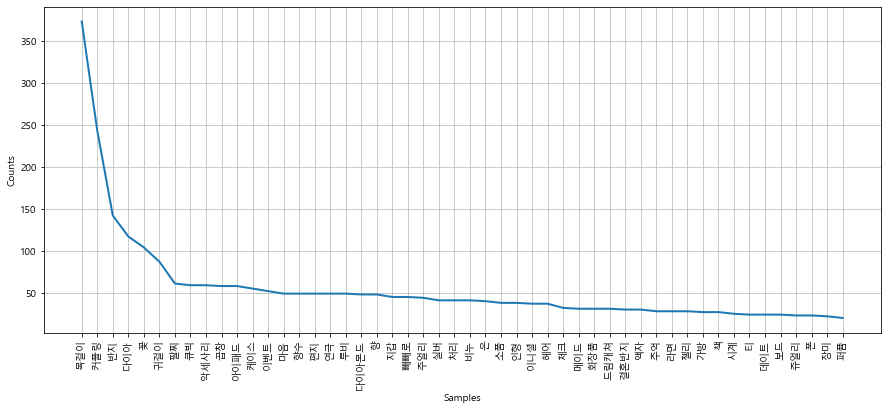

In [143]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [144]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

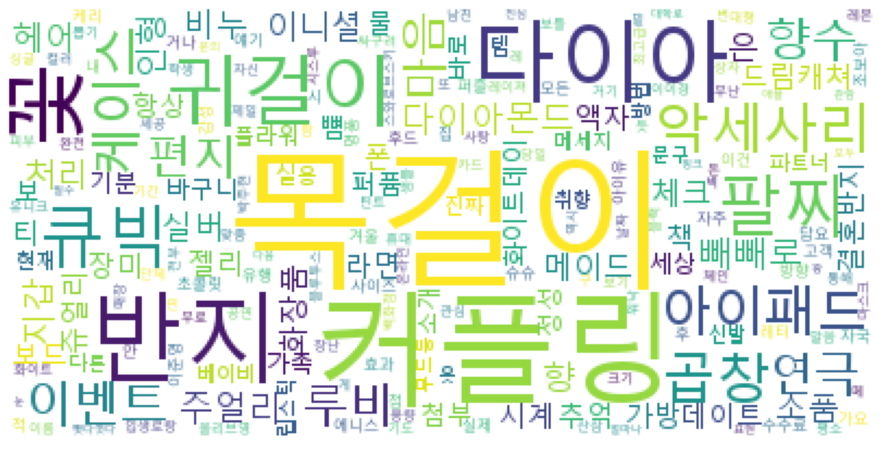

In [145]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.5,
                      background_color= 'white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [148]:
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [149]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.1,
                      mask = mask,
                      background_color= 'white',
                      min_font_size= 1,
                      max_font_size= 100
                      ).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array()

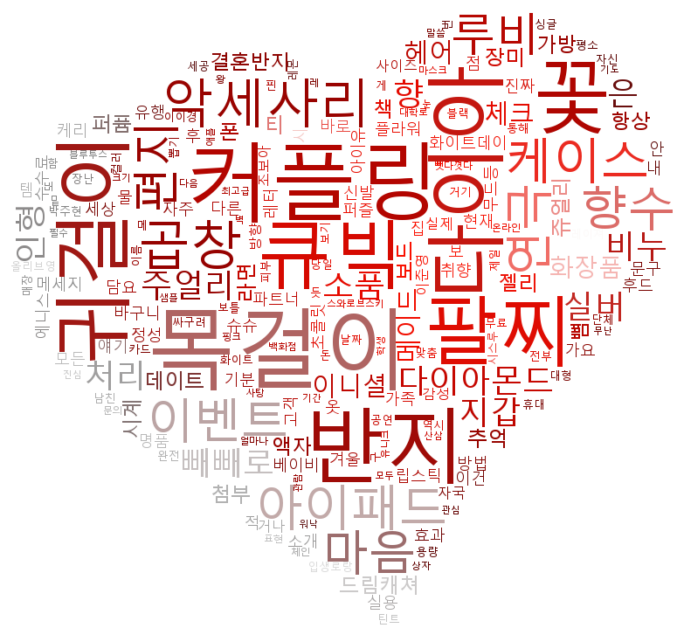

In [150]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()